<a href="https://colab.research.google.com/github/horsinnaround/Data-Science-Tools/blob/main/scratchpad_Chapter_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 'https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz'

Downloading...
From: https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz
To: /content/amazon-massive-dataset-1.0.tar.gz
100% 39.5M/39.5M [00:00<00:00, 46.0MB/s]


In [2]:
!tar -xzvf '/content/amazon-massive-dataset-1.0.tar.gz';

1.0/
1.0/CITATION.md
1.0/NOTICE.md
1.0/data/
1.0/data/mn-MN.jsonl
1.0/data/af-ZA.jsonl
1.0/data/el-GR.jsonl
1.0/data/ta-IN.jsonl
1.0/data/ar-SA.jsonl
1.0/data/ur-PK.jsonl
1.0/data/pl-PL.jsonl
1.0/data/ko-KR.jsonl
1.0/data/az-AZ.jsonl
1.0/data/da-DK.jsonl
1.0/data/kn-IN.jsonl
1.0/data/tl-PH.jsonl
1.0/data/is-IS.jsonl
1.0/data/lv-LV.jsonl
1.0/data/it-IT.jsonl
1.0/data/es-ES.jsonl
1.0/data/fr-FR.jsonl
1.0/data/ml-IN.jsonl
1.0/data/km-KH.jsonl
1.0/data/fa-IR.jsonl
1.0/data/sw-KE.jsonl
1.0/data/en-US.jsonl
1.0/data/tr-TR.jsonl
1.0/data/bn-BD.jsonl
1.0/data/he-IL.jsonl
1.0/data/te-IN.jsonl
1.0/data/pt-PT.jsonl
1.0/data/ka-GE.jsonl
1.0/data/ja-JP.jsonl
1.0/data/id-ID.jsonl
1.0/data/ru-RU.jsonl
1.0/data/hy-AM.jsonl
1.0/data/nb-NO.jsonl
1.0/data/ms-MY.jsonl
1.0/data/sq-AL.jsonl
1.0/data/sv-SE.jsonl
1.0/data/fi-FI.jsonl
1.0/data/th-TH.jsonl
1.0/data/de-DE.jsonl
1.0/data/vi-VN.jsonl
1.0/data/my-MM.jsonl
1.0/data/jv-ID.jsonl
1.0/data/sl-SL.jsonl
1.0/data/hi-IN.jsonl
1.0/data/nl-NL.jsonl
1.0/data/z

In [3]:
import json

In [4]:
import pandas as pd

In [302]:
data = []
for id in open('/content/1.0/data/en-US.jsonl','r'):
    data.append(json.loads(id))

In [303]:
l = ['utt','scenario','id']

In [304]:
dataset = pd.DataFrame(data)

In [305]:
dataset = dataset[l]
dataset

,utt,scenario,id
0,wake me up at five am this week,alarm,0
1,wake me up at nine am on friday,alarm,1
2,set an alarm for two hours from now,alarm,2
3,quiet,audio,3
4,olly quiet,audio,4
...,...,...,...
16516,do i have emails,email,17176
16517,what emails are new,email,17177
16518,do i have new emails from john,email,17178
16519,has john sent me an email,email,17179


In [306]:
import re

In [355]:
def rere(x):
    x = re.sub(r"[.,.،_؟!@#$%?!]","",x)
    x = re.sub(r'[  ]',' ',x)
    return x
# def rere(x):
#     x.str.replace()

In [356]:
dataset['utt'] = dataset['utt'].apply(lambda x:rere(x))

In [ ]:
dataset['scenario'].value_counts().shape

(18,)

In [ ]:
dataset[dataset['scenario']=='weather'][120:129]

,utt,scenario,id
983,how is the weather right now,weather,1020
1014,how hot is it outside,weather,1051
1015,what is the chance of rain today,weather,1052
1042,what will be tomorrow's weather in this location,weather,1079
1043,give me tomorrow's weather update,weather,1080
1044,show me weather list for tomorrow,weather,1081
1067,what's the current weather in new jersey,weather,1104
1068,get me the weather forecast of beijing,weather,1105
1069,i want to know the weather in nashik,weather,1106


In [ ]:
pd.isna(dataset).sum().sum()

0

# Part One Vectorize

In [ ]:
dataset_dummy = dataset['utt'].str.get_dummies(' ')

In [ ]:
dataset_dummy

In [ ]:
dataset_dummy.columns[5568]

'takeaways'

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Times New Roman"
# !pip install wordcloud-fa
# from wordcloud_fa import WordCloudFa
# import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
dataset['utt']

0            wake me up at five am this week
1            wake me up at nine am on friday
2        set an alarm for two hours from now
3                                      quiet
4                                 olly quiet
                        ...                 
16516                       do i have emails
16517                    what emails are new
16518         do i have new emails from john
16519              has john sent me an email
16520                  check email from john
Name: utt, Length: 16521, dtype: object

In [ ]:
dataset['scenario'].value_counts()

calendar          2370
play              2024
qa                1685
email             1381
iot               1107
general            963
weather            855
transport          805
lists              793
news               709
recommendation     596
datetime           578
social             565
alarm              550
music              469
audio              387
takeaway           358
cooking            326
Name: scenario, dtype: int64

In [ ]:
# text = ' '
# for i in set(dataset['scenario']):
#     plt.figure(figsize=(12,8))
#     text = " ".join(t for t in dataset[dataset['scenario']==i].utt)
#     wordclouds = WordCloud(width=1200, height=900).generate(text)
#     plt.title(i)

#     plt.imshow(wordclouds, interpolation='bilinear')
#     plt.axis("off")
#     plt.savefig(f'./{i}.png',bbox_inches='tight')
#     plt.show()

In [ ]:
# figs,axes = plt.subplots(6,3,figsize=(18, 29))
# axes2 = axes.flat
# j = 0
# for i in set(dataset['scenario']):
#     # plt.figure(figsize=(12,8))
#     text = " ".join(t for t in dataset[dataset['scenario']==i].utt)
#     wordclouds = WordCloud(width=800, height=600).generate(text)
#     axes2[j].title.set_text(i)

#     axes2[j].imshow(wordclouds, interpolation='bilinear')
#     axes2[j].axis("off")
#     j += 1
# plt.savefig('./wordcloud.png', bbox_inches='tight')

# # plt.show()

In [ ]:
# g = np.array(wordclouds)
# g.shape

In [ ]:
# col = dataset_dummy.columns
# col2 = []
# for i in col:
#     if len(i) >1:
#         col2.append(i)
# dataset_dummy = dataset_dummy[col2]

In [ ]:
S = dataset['scenario'].factorize()
dataset_dummy['target'] = S[0]
label = S[1]

In [ ]:
dataset.iloc[0].utt

'wake me up at five am this week'

In [ ]:
dataset_dummy.iloc[0]

&           0
<empty>     0
a           0
aa          0
aamir       0
           ..
zone        0
zones       0
zoo         0
zucchini    0
zydeco      0
Name: 0, Length: 6326, dtype: int64

In [ ]:
import numpy as np

In [ ]:
# Split Data to Test and Train Sets

In [ ]:
dsdum = dataset_dummy.sample(frac=1)

In [ ]:
datats = dsdum[0:-1:5]

In [ ]:
datatr = dsdum.drop(datats.index)

In [ ]:
print("train size: {}\ntest size {}".format(datatr.shape[0],datats.shape[0]))

train size: 13217
test size 3304


# Machine Learning / Deep Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(datatr.drop('target',axis=1),datatr['target'])

DecisionTreeClassifier()

In [ ]:
dts = dt.predict(datats.drop('target',axis=1))

In [ ]:
dtsf = pd.DataFrame()
dtsf["real"] = list(datats['target'])
dtsf['pres'] = list(dts)

In [ ]:
print(f"The accuracy: {dtsf[dtsf['pres']==dtsf['real']].shape[0]/dtsf.shape[0]}")

The accuracy: 0.8008474576271186


In [ ]:
# Numpying the data
X,Y,x,y = datatr.drop('target',axis=1).to_numpy().astype('float64'),datatr['target'].to_numpy(),datats.drop('target',axis=1).to_numpy().astype('float64'),datats['target'].to_numpy()

In [ ]:
# x = x.reshape(x.shape[0], x.shape[1], 1)
# X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# x = x.reshape(x.shape[0], x.shape[1])
# X = X.reshape(X.shape[0], X.shape[1])

In [ ]:
# One hot encoding test labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y = b

In [ ]:
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y = b

In [50]:
import tensorflow as tf
dir(tf.keras)
from tensorflow.keras import Sequential,Input,layers
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:print('Found GPU at: {}'.format(device_name))

GPU device not found


In [ ]:
dir(tf.keras.losses)

In [ ]:
X.shape

(13217, 6325)

In [ ]:
# model = Sequential()
# model.add(layers.Conv1D(512, 64, activation="relu", input_shape=(X.shape[1],X.shape[2])))
# model.add(layers.Dense(128, activation="relu"))
# model.add(layers.MaxPooling1D())
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dense(18, activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', 
#      optimizer = "adam",               
#               metrics = ['accuracy'])
# model.summary()

In [ ]:
# history = model.fit(X,Y,32,4,validation_data=(x,y))

In [ ]:
# Creating the deep learning model
model = tf.keras.Sequential()
model.add(Input( shape=(X.shape[1],)))
# input_shape = (0,X.shape[0],X.shape[1])

model.add(layers.Dense(128,'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64,'relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               809728    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 18)                1170      
                                                                 
Total params: 819,154
Trainable params: 819,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X,Y,32,4,validation_data=(x,y))

Epoch 1/4
414/414 [==============================] - 5s 11ms/step - loss: 1.2248 - accuracy: 0.6776 - val_loss: 0.4984 - val_accuracy: 0.8677
Epoch 2/4
414/414 [==============================] - 4s 9ms/step - loss: 0.3351 - accuracy: 0.9109 - val_loss: 0.4137 - val_accuracy: 0.8874
Epoch 3/4
414/414 [==============================] - 4s 10ms/step - loss: 0.1871 - accuracy: 0.9509 - val_loss: 0.4121 - val_accuracy: 0.8892
Epoch 4/4
414/414 [==============================] - 4s 10ms/step - loss: 0.1230 - accuracy: 0.9674 - val_loss: 0.4326 - val_accuracy: 0.8898


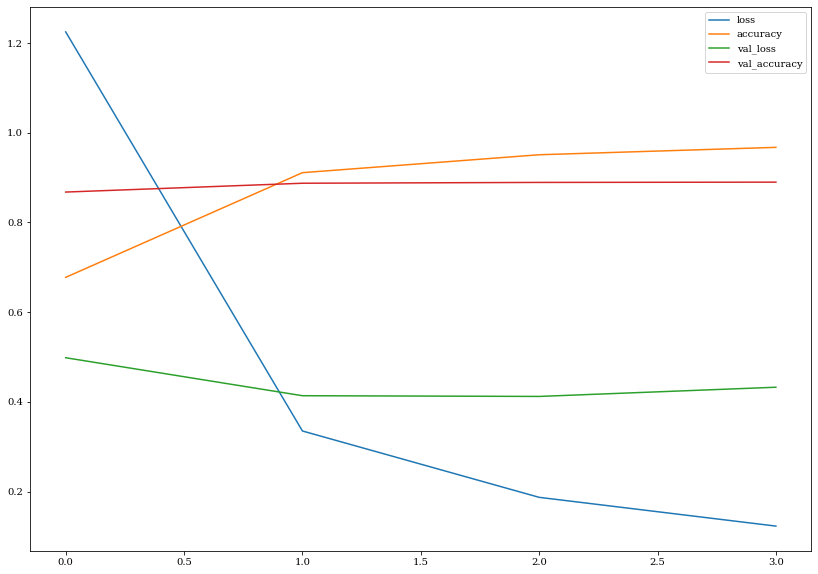

In [ ]:
pd.DataFrame(history.history).plot(figsize=(14,10));
# plt.figure(dpi=200)
# plt.savefig('./g.png')

In [ ]:
y_test = model.predict(x)

104/104 [==============================] - 0s 3ms/step


In [ ]:
y_pre = y_test.argmax(axis=1)

In [ ]:
y_tre = y.argmax(axis=1)

In [ ]:
print(f"the accuracy is: {(y_pre==y_tre).sum()/y_pre.shape[0]}")

the accuracy is: 0.8916464891041163


In [ ]:
v = 6
y_test = model.predict(x[v:v+1])

1/1 [==============================] - 0s 21ms/step


In [ ]:
# Check if th predict label is true or not
print(label[y_test.argmax()],label[y[v].argmax()])

social social


In [ ]:
def generate(text):
    text = rere(text)
    new = np.zeros(dataset_dummy.columns.shape[0]-1)
    newt = text.split()
    for i,ne in enumerate(dataset_dummy.columns):
        if ne in newt:
            # print(ne)
            new[i]=1
    print(f'{int(new.sum())}/{len(newt)}')
    return new

In [ ]:
text = input()

xp = generate(text)

y_test = model.predict(xp.reshape((1,-1)));
p = np.flip(np.argsort(y_test))[0][0:3]
# print(y_test.argmax(),label[y_test.argmax()])
print('it could be:\n{} with {}\n{} with {}\n{} with {}'.format(label[p[0]],y_test[0][p[0]],label[p[1]],y_test[0][p[1]],label[p[2]],y_test[0][p[2]]))

sex
1/1
1/1 [==============================] - 0s 18ms/step
it could be:
general with 0.9399766325950623
music with 0.010030246339738369
calendar with 0.007336896378546953


In [ ]:
label[p],y_test[0][p]

(Index(['general', 'qa', 'play', 'audio', 'news', 'email', 'music', 'iot',
        'calendar', 'lists', 'cooking', 'social', 'takeaway', 'weather',
        'transport', 'recommendation', 'datetime', 'alarm'],
       dtype='object'),
 array([0.46843198, 0.10765477, 0.09410164, 0.0450245 , 0.04026192,
        0.03527036, 0.03294452, 0.02641904, 0.02637018, 0.02341259,
        0.02296855, 0.01792793, 0.01359527, 0.01335226, 0.01186631,
        0.01088644, 0.00681915, 0.00269259], dtype=float32))

# Part 2 DataStuff

In [ ]:
dataset_dummys = datats

In [ ]:
lst = [[] for i in range(18)]

In [ ]:
for i in set(dataset_dummys.target):
    lst[i] = dataset_dummys[dataset_dummys.target==i].index

In [ ]:
lst[0]

Int64Index([2415, 3054, 4443, 3569, 4877, 5301, 2960, 3830, 1904, 1912,
            ...
             200,  588, 3825, 3853, 5300, 4915, 2091, 1585, 2007, 4433],
           dtype='int64', length=123)

In [ ]:
cols = dataset_dummys.columns

In [ ]:
dts = dataset_dummys.drop('target',axis=1)

In [ ]:
label

Index(['alarm', 'audio', 'iot', 'calendar', 'play', 'general', 'datetime',
       'takeaway', 'news', 'music', 'weather', 'qa', 'social',
       'recommendation', 'cooking', 'transport', 'email', 'lists'],
      dtype='object')

In [ ]:
s = 1
dt = dts.loc[lst[s]]
print("num: {}".format(dt.shape[0]))
dt_num = dt.sum(axis=0).to_numpy()
dt_nump = pd.Series(dt_num)
dt_nump = dt_nump.sort_values()
ind = dt_nump.index
print(label[s])
cols[list(ind[int(ind.shape[0]*0.99):])]

num: 76
audio


Index(['noise', 'low', 'am', 'make', 'notifications', 'answer', 'alexa',
       'decrease', 'loud', 'all', 'do', 'five', 'pause', 'google', 'little',
       'no', 'hours', 'your', 'in', 'hour', 'could', 'tempo', 'music', 'on',
       'next', 'my', 'thanksgiving', 'of', 'not', 'off', 'it', 'twitter',
       'need', 'silent', 'silence', 'minutes', 'sound', 'louder', 'speak',
       'olly', 'set', 'level', 'unset', 'speaker', 'be', 'change', 'settings',
       'increase', 'hear', 'quiet', 'can', 'down', 'until', 'lower',
       'speakers', 'yosemite', 'for', 'mute', 'turks', 'tmz', 'please',
       'that's', 'volkswagen'],
      dtype='object')

In [ ]:
# Next three Cell for important words
play = dts.loc[lst[4]]
music = dts.loc[lst[9]]

In [ ]:
cols[np.flip(np.argsort(music.sum(axis=0).to_numpy()))[0:10]]

Index(['song', 'that's', 'thirty', 'is', 'whales', 'save', 'of', 'my',
       'playing', 'on'],
      dtype='object')

In [ ]:
cols[np.flip(np.argsort(play.sum(axis=0).to_numpy()))[0:10]]

Index(['play', 'that's', 'tmz', 'my', 'please', 'music', 'me', 'radio',
       'playlist', 'and'],
      dtype='object')

In [ ]:
music.sum(axis=0).sum(),play.sum(axis=0).sum()

(532, 2217)

In [ ]:
np.dot(play.mean(axis=0) , music.mean(axis=0))

0.32847346451997617

In [ ]:
# Correlation between Two Classes
i,j = 4,4
print(label[i],"and",label[j])
np.dot(dts.loc[lst[i]].mean(axis=0),dts.loc[lst[j]].mean(axis=0))

play and play


0.6382708744247205

In [ ]:
mu = dts.loc[lst[11]]
cols[np.flip(np.argsort(mu.mean(axis=0).to_numpy()))[0:10]]

Index(['that's', 'is', 'whales', 'of', 'how', 'me', 'in', 'television', 'tmz',
       'does'],
      dtype='object')

In [ ]:
cor = np.zeros((18,18))
for i in range(18):
    for j in range(18):
        cor[i,j] = np.dot(dts.loc[lst[i]].var(axis=0),dts.loc[lst[j]].var(axis=0))

In [ ]:
i,j = 5,10
print(label[i],"and",label[j])
print(cor[i,j])

general and weather
0.21476605515314146


In [ ]:
cor = cor/cor.max()

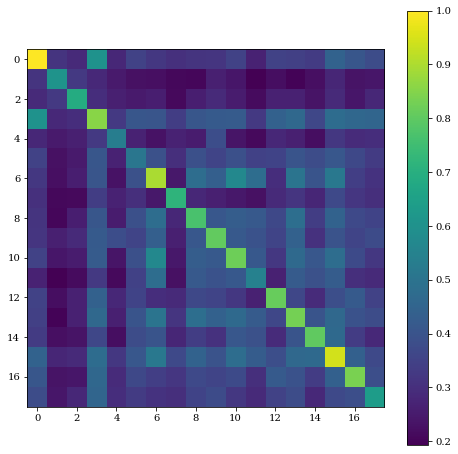

In [ ]:
# Correlation between Classes
plt.figure(figsize=(8,8))
plt.imshow(cor)
plt.colorbar()
# plt.yticks(labels=label,ticks=range(18))
# plt.xticks(labels=label,ticks=range(18),rotation=-90)
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
con = confusion_matrix(y_tre,y_pre)
con = con/con.max()

In [ ]:
for i in range(18):
    con[i,i] = 0
    cor[i,i] = 0

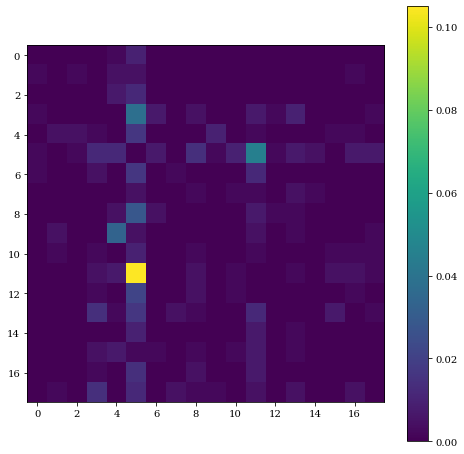

In [ ]:
# Correlation between Classes
plt.figure(figsize=(8,8))
plt.imshow(con)
plt.colorbar()
# plt.yticks(labels=label,ticks=range(18))
# plt.xticks(labels=label,ticks=range(18),rotation=-90)
plt.show()


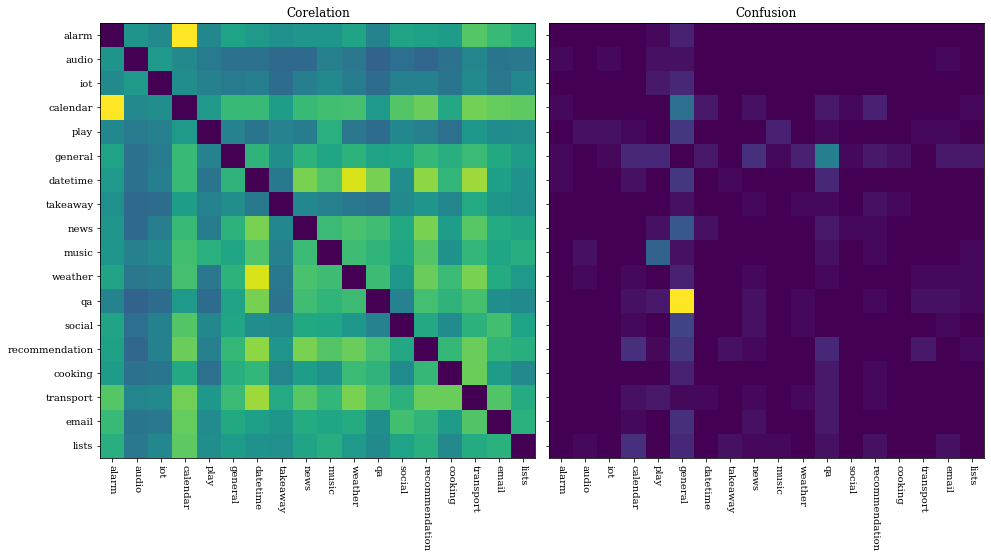

In [ ]:
figs,axis = plt.subplots(1,2,figsize=(16,8),sharey=True)
figs.subplots_adjust(wspace=0.01)
axis[0].imshow(cor)
axis[0].set_xticks(range(18))
axis[0].set_yticks(range(18))
axis[0].set_xticklabels(labels=label,rotation=-90)
axis[0].set_yticklabels(labels=label,rotation=0)
axis[0].title.set_text("Corelation")

axis[1].imshow(con)
axis[1].set_xticks(range(18))
axis[1].set_yticks(range(18))
axis[1].set_xticklabels(labels=label,rotation=-90)
axis[1].set_yticklabels(labels=label,rotation=0)
axis[1].title.set_text("Confusion")



In [ ]:
axis[0].set_xticklabels(labels=label)

[Text(0, 0, 'alarm'),
 Text(1, 0, 'audio'),
 Text(2, 0, 'iot'),
 Text(3, 0, 'calendar'),
 Text(4, 0, 'play'),
 Text(5, 0, 'general'),
 Text(6, 0, 'datetime'),
 Text(7, 0, 'takeaway'),
 Text(8, 0, 'news'),
 Text(9, 0, 'music'),
 Text(10, 0, 'weather'),
 Text(11, 0, 'qa'),
 Text(12, 0, 'social'),
 Text(13, 0, 'recommendation'),
 Text(14, 0, 'cooking'),
 Text(15, 0, 'transport'),
 Text(16, 0, 'email'),
 Text(17, 0, 'lists')]

In [ ]:
dir(axis[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title'

In [ ]:
print(confusion_matrix(y_tre,y_pre))

[[118   0   0   0   1   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  69   1   0   2   2   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0 225   0   3   5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0 419   0  16   3   0   2   0   0   3   1   4   0   0   0   1]
 [  0   2   2   1 371   7   0   0   0   4   0   1   0   0   0   1   1   0]
 [  1   0   1   5   5 144   3   0   6   1   4  19   1   3   2   0   3   3]
 [  1   0   0   2   0   7  97   1   0   0   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0  63   1   0   1   1   0   2   1   0   0   0]
 [  0   0   0   0   2  12   2   0 119   0   0   3   1   1   0   0   0   0]
 [  0   2   0   0  14   2   0   0   0  64   0   2   0   1   0   0   0   1]
 [  0   1   0   1   0   4   0   0   1   0 174   1   0   0   0   1   1   1]
 [  0   0   0   2   3  44   0   0   2   0   1 271   0   1   0   2   2   1]
 [  0   0   0   1   0   9   0   0   2   0   1   0  93   0   0   0   1   0]
 [  0   0   0   6   1   7

In [ ]:
print(classification_report(y_tre,y_pre))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       123
           1       0.92      0.91      0.91        76
           2       0.98      0.97      0.97       233
           3       0.94      0.93      0.94       450
           4       0.92      0.95      0.93       390
           5       0.51      0.72      0.60       201
           6       0.92      0.86      0.89       113
           7       0.93      0.89      0.91        71
           8       0.86      0.85      0.86       140
           9       0.91      0.74      0.82        86
          10       0.96      0.94      0.95       185
          11       0.84      0.82      0.83       329
          12       0.97      0.87      0.92       107
          13       0.87      0.80      0.83       131
          14       0.95      0.89      0.92        71
          15       0.96      0.92      0.94       168
          16       0.96      0.96      0.96       267
          17       0.95    

# Tfidf

In [309]:
dataset = dataset.sample(frac=1)
S = dataset['scenario'].factorize()
labels = S[0]
label_name = S[1]

In [61]:
dataset['utt'] = dataset['utt'].apply(lambda x:replacer.replace(x))

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [339]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(dataset.utt).toarray()
features.shape

(16521, 4308)

In [166]:
S = tfidf.vocabulary_

In [169]:
Sl = list(S.keys())

In [171]:
for i in Sl:
    if len(i)<3:
        Sl.remove(i)

In [172]:
len(Sl)

1267

In [ ]:
dir(tfidf)

In [341]:


vectorizer = CountVectorizer( min_df=5, ngram_range=(1, 2),stop_words='english')
vectors = vectorizer.fit_transform(dataset.utt)

features.shape

(16521, 4308)

In [344]:
from sklearn.preprocessing import Binarizer

freq   = CountVectorizer( min_df=5, ngram_range=(1, 2),stop_words='english')
corpus = freq.fit_transform(dataset.utt)

onehot = Binarizer()
features = onehot.fit_transform(corpus.toarray())
features.shape

(16521, 2359)

In [345]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer(min_df=10, ngram_range=(1, 5))
features = tfidf.fit_transform(dataset.utt).toarray()

features.shape

(16521, 2912)

In [ ]:

from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = dataset.utt
# create the transform
vectorizer = HashingVectorizer(n_features=8000)
# encode document
features = vectorizer.transform(text)
# summarize encoded vector
print(features.shape)
features = features.toarray()

(16521, 8000)


In [347]:
features = h

In [318]:
p = 0.80
u = int(features.shape[0] * p)
X = features[0:u]
Y = labels[0:u]
x = features[u:]
y = labels[u:]
print("train size: {}\ntest size: {}".format(Y.shape,y.shape))

train size: (13216,)
test size: (3305,)


In [349]:
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y2 = b
# One hot encoding train labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y2 = b

In [350]:
# Creating the deep learning model
model = tf.keras.Sequential()
model.add(Input( shape=(X.shape[1],)))

# model.add(layers.Dense(512,'relu'))
# model.add(layers.Dropout(0.22))

model.add(layers.Dense(256,'relu'))
model.add(layers.Dropout(0.21))

model.add(layers.Dense(72,'relu'))
model.add(layers.Dropout(0.21))

model.add(layers.Dense(18, activation='softmax'))

model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 256)               650752    
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 72)                18504     
                                                                 
 dropout_34 (Dropout)        (None, 72)                0         
                                                                 
 dense_49 (Dense)            (None, 18)                1314      
                                                                 
Total params: 670,570
Trainable params: 670,570
Non-trainable params: 0
_________________________________________________________________


In [351]:
history = model.fit(X,Y2,32,16,validation_data=(x,y2))

Epoch 1/16
413/413 [==============================] - 4s 9ms/step - loss: 1.2243 - accuracy: 0.6758 - val_loss: 0.5345 - val_accuracy: 0.8511
Epoch 2/16
413/413 [==============================] - 4s 9ms/step - loss: 0.4586 - accuracy: 0.8719 - val_loss: 0.4679 - val_accuracy: 0.8654
Epoch 3/16
413/413 [==============================] - 4s 9ms/step - loss: 0.3447 - accuracy: 0.8969 - val_loss: 0.4694 - val_accuracy: 0.8629
Epoch 4/16
413/413 [==============================] - 4s 9ms/step - loss: 0.2912 - accuracy: 0.9119 - val_loss: 0.4883 - val_accuracy: 0.8626
Epoch 5/16
413/413 [==============================] - 4s 10ms/step - loss: 0.2606 - accuracy: 0.9205 - val_loss: 0.5047 - val_accuracy: 0.8651
Epoch 6/16
413/413 [==============================] - 4s 9ms/step - loss: 0.2378 - accuracy: 0.9239 - val_loss: 0.5283 - val_accuracy: 0.8626
Epoch 7/16
413/413 [==============================] - 4s 9ms/step - loss: 0.2250 - accuracy: 0.9286 - val_loss: 0.5400 - val_accuracy: 0.8654
Epoch

KeyboardInterrupt: ignored

In [12]:
from nltk.stem import PorterStemmer
import nltk
import nltk.stem as st
nltk.download('rslp')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [69]:
dataset

,utt,scenario,id
4222,i want some coffee,iot,4368
11202,where be the nearest pub in the city,recommendation,11608
5143,please find me music,play,5327
7500,set a recur event in my calendar,calendar,7754
14311,find me some celebrities that be capricorns,qa,14868
...,...,...,...
184,turn on my playlist and play third song in the...,play,185
6303,who will win this presidential election,general,6528
14867,tweet consumer service that the goods be of lo...,social,15449
14390,open internet,qa,14951


In [15]:
def lammen(text):
    textw = text.split()
    for i,j in enumerate(textw):
        textw[i] = Lemmatizer.lemmatize(j,pos='v')
    text = ''
    text = " ".join(t for t in textw)
    return text

In [ ]:
dataset2 = dataset2.apply(lambda x:lammen(x))

In [43]:
dataset2

0            wake me up at five be this week
1            wake me up at nine be on friday
2        set an alarm for two hours from now
3                                      quiet
4                                 olly quiet
                        ...                 
16516                        do i have email
16517                      what email be new
16518          do i have new email from john
16519             have john send me an email
16520                  check email from john
Name: utt, Length: 16521, dtype: object

In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 5))
features = tfidf.fit_transform(dataset2).toarray()
features.shape

(16521, 6862)

In [39]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 5))
features = tfidf.fit_transform(dataset.utt).toarray()
features.shape

(16521, 6733)

In [35]:
lammen("hey you did breads")

'hey you do bread'

In [14]:
Lemmatizer = st.WordNetLemmatizer()
for s in ["don't","doing","painting","cookery","buses","did"]:
    print(Lemmatizer.lemmatize(s,pos='v'))

don't
do
paint
cookery
bus
do


In [17]:
import re

In [24]:
replacement_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'can not'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')
]

In [25]:
class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in
        patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

In [26]:
replacer = RegexpReplacer()

In [27]:
replacer.replace("can't is a contraction")

'can not is a contraction'

In [ ]:
dir(nltk.stem)

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

In [101]:
import enchant
from nltk.metrics import edit_distance
class SpellingReplacer(object):
    def __init__(self, dict_name='en', max_dist=2):
        self.spell_dict = enchant.Dict(dict_name)
        self.max_dist = max_dist
    def replace(self, word):
        if self.spell_dict.check(word):
            return word
        suggestions = self.spell_dict.suggest(word)
        if suggestions and edit_distance(word, suggestions[0]) <= self.max_dist:
            return suggestions[0]
        else:
            return word


In [107]:
replacer = SpellingReplacer()
replacer.replace('pritn')

'print'

In [108]:
d = enchant.Dict('en')

In [115]:
d.suggest('languege')[0]


'language'

In [110]:
from nltk.metrics import edit_distance

In [114]:
edit_distance('Angela', 'language')


6

In [119]:
dataset2 = dataset2.apply(lambda x:lammen(x))

In [120]:
dataset2

0         quake ME u ta dive Be thighs week
1           quake ME u ta nine Be ON Friday
2        est ab alarm fro tow hour form NOW
3                                     quite
4                               lolly quite
                        ...                
16516                       dew I gave mail
16517                       thaw mail Be no
16518          dew I gave no mail form John
16519             gave John dens ME ab mail
16520                  check mail form John
Name: utt, Length: 16521, dtype: object

In [123]:
dataset

,utt,scenario,id
4222,i want some coffee,iot,4368
11202,where be the nearest pub in the city,recommendation,11608
5143,please find me music,play,5327
7500,set a recur event in my calendar,calendar,7754
14311,find me some celebrities that be capricorns,qa,14868
...,...,...,...
184,turn on my playlist and play third song in the...,play,185
6303,who will win this presidential election,general,6528
14867,tweet consumer service that the goods be of lo...,social,15449
14390,open internet,qa,14951


In [118]:
def lammen(text):
    textw = text.split()
    for i,j in enumerate(textw):
        try:
            textw[i] = d.suggest(j)[0]
        except:
            pass
    text = ''
    text = " ".join(t for t in textw)
    return text

In [127]:
d.suggest("coffee")[0]

'coffee'

# New Works

In [135]:
import re
ie = re.IGNORECASE

In [129]:
r = "(hi|hello|hey)[ ]*([a-z]*)"

In [134]:
re.match(r, 'Hello Rosa hello reza', flags=ie)

<re.Match object; span=(0, 10), match='Hello Rosa'>

In [137]:
re.match(r, "hi ho hi ho", flags=ie)

<re.Match object; span=(0, 5), match='hi ho'>

In [142]:
re.match(r, "hey. ehats up", flags=ie)

<re.Match object; span=(0, 3), match='hey'>

In [156]:
r = r"[^a-z]*([y]o|[h']?ello|ok|hey|(good[ ])?(morn[gin']{0,3}|"\
... r"afternoon|even[gin']{0,3}))[\s,;:]{1,3}([a-z]{1,20})"
r

"[^a-z]*([y]o|[h']?ello|ok|hey|(good[ ])?(morn[gin']{0,3}|afternoon|even[gin']{0,3}))[\\s,;:]{1,3}([a-z]{1,20})"

In [147]:
re_greeting = re.compile(r, flags=re.IGNORECASE)

In [154]:
re_greeting.match('Hello Rosa good morning')

<re.Match object; span=(0, 11), match=' Hello Rosa'>

In [158]:
re_greeting.match('good evening Rosa').groups()

('good evening', 'good ', 'evening', 'Rosa')

# Wait a minute

In [ ]:
 (r'won\'t', 'will not'),
 (r'can\'t', 'can not'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')

In [363]:
def ret(test):
    test = re.sub(r'won\'t', 'will not',test)
    test = re.sub(r'can\'t', 'can not',test)
    test = re.sub(r'i\'m', 'i am',test)
    test = re.sub(r'ain\'t', 'is not',test)
    test = re.sub(r'(\w+)\'ll', '\g<1> will',test)
    test = re.sub(r'(\w+)n\'t', '\g<1> not',test)
    test = re.sub(r'(\w+)\'ve', '\g<1> have',test)
    test = re.sub(r'(\w+)\'s', '\g<1> is',test)
    test = re.sub(r'(\w+)\'re', '\g<1> are',test)
    test = re.sub(r'(\w+)\'d', '\g<1> would',test)
    return test

In [364]:
dataset.utt = dataset.utt.apply(lambda x:ret(x))

In [365]:
text = " ".join(txt for txt in dataset.utt)

In [366]:
text

"am i on vacation this week do you think it would rain today show me tomorrow is weather in this area app management give us president is election news have i received any emails in the last hour lights out find an uber on twenty ninth save opinion lower the light to forty percent change my room lights to some romantic color can the latest news be pulled up on the latest weather forecast for the week hi google please remove the dinner plan on thursday please post so bored to facebook can you tell me the times the train leaves for chicago please set event on tuesday play the newest bob dylan playlist it is depend pon the seen what do i have planned today how tall is brad pitt make the living room light orange what lists are in my notebook could you tell me who is birthdays are there in february play the first playlist tennis show me events in sacramento please tell me when is my financial meeting please play podcasts on science my schedule i want to hear country music celebrities remind

In [178]:
from collections import Counter

In [387]:
S = Counter(text.split())

In [394]:
len(S)
# 19

6120

In [393]:
S.pop('i')

2422

In [371]:
dir(S)

['__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'fromkeys',
 'get',
 'items',
 'keys',
 'most_common',
 'pop',
 'popitem',
 'setdefault',
 'subtract',
 'update',
 'values']

In [219]:
# library = np.zeros((len(dataset),len(SL)))
# library.shape
dataset.shape

(16521, 3)

In [241]:

def libr(text):
    library = np.zeros(SL.shape)
    l1 = Counter(text.split())
    for i,j in l1.items():
        library[np.where(SL == i)[0]] = j
    return library

In [242]:
p = dataset['scenario'].factorize()
labels_n = p[1]
labels = p[0]

In [243]:
libr("i want")

array([1., 0., 0., ..., 0., 0., 0.])

In [246]:
dataset['utt']

4222                                    i want some coffee
11202                 where be the nearest pub in the city
5143                                  please find me music
7500                      set a recur event in my calendar
14311          find me some celebrities that be capricorns
                               ...                        
184      turn on my playlist and play third song in the...
6303               who will win this presidential election
14867    tweet consumer service that the goods be of lo...
14390                                        open internet
7096     check the events on calendar and delete the ne...
Name: utt, Length: 16521, dtype: object

In [269]:
vec = dataset['utt'].apply(lambda x:libr(x))
h = vec.to_numpy()
h = np.stack(h)
h.shape

(16521, 1267)

In [277]:
h /= h.sum(axis=0)

In [ ]:
h

In [179]:
Counter('i want some coffee'.split())

Counter({'i': 1, 'want': 1, 'some': 1, 'coffee': 1})

In [159]:
dataset

,utt,scenario,id
4222,i want some coffee,iot,4368
11202,where be the nearest pub in the city,recommendation,11608
5143,please find me music,play,5327
7500,set a recur event in my calendar,calendar,7754
14311,find me some celebrities that be capricorns,qa,14868
...,...,...,...
184,turn on my playlist and play third song in the...,play,185
6303,who will win this presidential election,general,6528
14867,tweet consumer service that the goods be of lo...,social,15449
14390,open internet,qa,14951
